<a href="https://colab.research.google.com/github/aldder/MachineLearning/blob/master/Advanced%20cross-validation%20time%20series/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [153]:
btc = yf.download("BTC", start="2020-01-01", end="2021-12-31", group_by="ticker")

[*********************100%***********************]  1 of 1 completed


In [154]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 150 entries, 2020-10-01 to 2021-05-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       150 non-null    float64
 1   High       150 non-null    float64
 2   Low        150 non-null    float64
 3   Close      150 non-null    float64
 4   Adj Close  150 non-null    float64
 5   Volume     150 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 8.2 KB


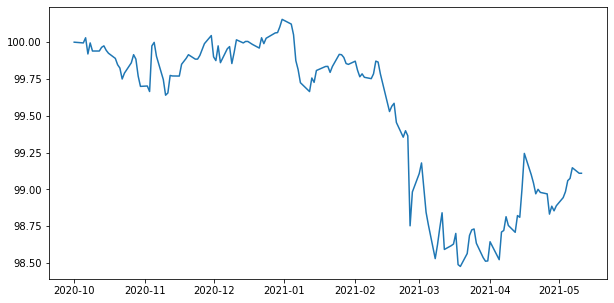

In [155]:
plt.figure(figsize=(10, 5))
plt.plot(btc['Close'])
plt.show()

# timeseriescv package


> !pip install -U timeseriescv

In [156]:
from timeseriescv.cross_validation import PurgedWalkForwardCV, CombPurgedKFoldCV

In [157]:
btc['pred_times'] = btc.index.shift(-1, 'd')
btc['eval_times'] = btc.index

### PurgedWalkForwardCV

In [158]:
cv1 = PurgedWalkForwardCV(n_splits=5, n_test_splits=1, min_train_splits=2, max_train_splits=None)

******************************
CV iter: 1
[TRAIN] (59) min dt: 2020-10-01 max dt: 2020-12-28 00:00:00
[VALID] (30) min dt: 2020-12-30 max dt: 2021-02-12 00:00:00


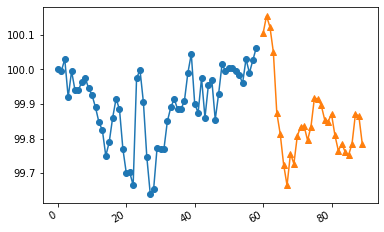

******************************
CV iter: 2
[TRAIN] (90) min dt: 2020-10-01 max dt: 2021-02-12 00:00:00
[VALID] (30) min dt: 2021-02-16 max dt: 2021-03-29 00:00:00


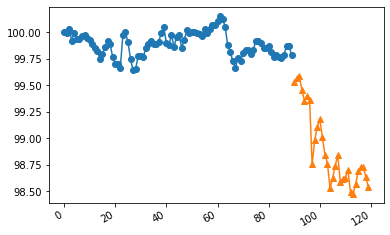

******************************
CV iter: 3
[TRAIN] (119) min dt: 2020-10-01 max dt: 2021-03-26 00:00:00
[VALID] (30) min dt: 2021-03-30 max dt: 2021-05-11 00:00:00


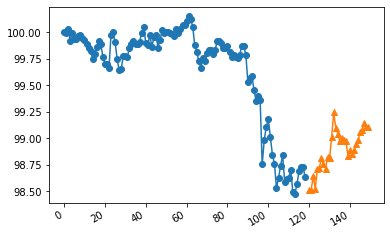

In [159]:
for i, (train, val) in enumerate(cv1.split(btc['Close'], pred_times=btc['pred_times'], eval_times=btc['eval_times'])):
    
    train_data, val_data = btc.iloc[train]['Close'], btc.iloc[val]['Close']
    
    print('*'*30)
    print(f'CV iter: {i+1}')
    print(f'[TRAIN] ({len(train_data)}) min dt: {str(train_data.index.min().date())} max dt: {str(train_data.index.max())}')
    print(f'[VALID] ({len(val_data)}) min dt: {str(val_data.index.min().date())} max dt: {str(val_data.index.max())}')
    plt.plot(figsize=(8,5))
    plt.plot(train, train_data, marker='o')
    plt.plot(val, val_data, marker='^')
    plt.gcf().autofmt_xdate()
    plt.show()

### CombPurgedKFoldCV

In [160]:
cv2 = CombPurgedKFoldCV(n_splits=5, n_test_splits=2, embargo_td=pd.Timedelta(days=30))

******************************
CV iter: 1
[TRAIN] (90) min dt: 2020-10-01 max dt: 2021-02-12 00:00:00
[VALID] (60) min dt: 2021-02-16 max dt: 2021-05-11 00:00:00


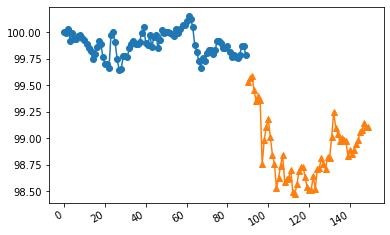

******************************
CV iter: 2
[TRAIN] (88) min dt: 2020-10-01 max dt: 2021-03-26 00:00:00
[VALID] (60) min dt: 2020-12-30 max dt: 2021-05-11 00:00:00


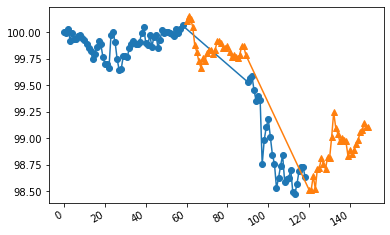

******************************
CV iter: 3
[TRAIN] (67) min dt: 2020-10-01 max dt: 2021-05-11 00:00:00
[VALID] (60) min dt: 2020-12-30 max dt: 2021-03-29 00:00:00


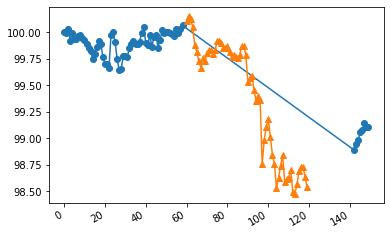

******************************
CV iter: 4
[TRAIN] (88) min dt: 2020-10-01 max dt: 2021-03-26 00:00:00
[VALID] (60) min dt: 2020-11-13 max dt: 2021-05-11 00:00:00


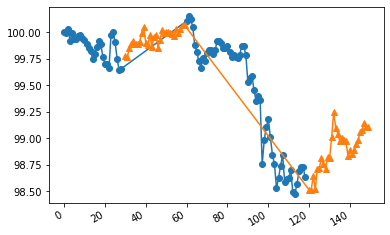

******************************
CV iter: 5
[TRAIN] (37) min dt: 2020-10-01 max dt: 2021-05-11 00:00:00
[VALID] (60) min dt: 2020-11-13 max dt: 2021-03-29 00:00:00


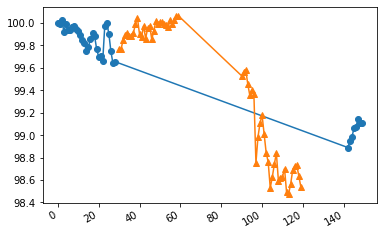

******************************
CV iter: 6
[TRAIN] (69) min dt: 2020-10-01 max dt: 2021-05-11 00:00:00
[VALID] (60) min dt: 2020-11-13 max dt: 2021-02-12 00:00:00


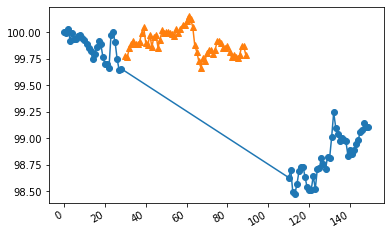

******************************
CV iter: 7
[TRAIN] (70) min dt: 2020-12-14 max dt: 2021-03-26 00:00:00
[VALID] (60) min dt: 2020-10-01 max dt: 2021-05-11 00:00:00


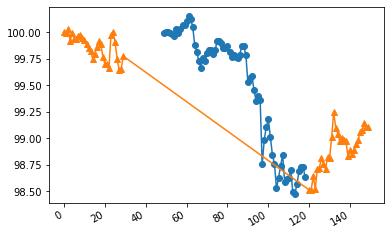

******************************
CV iter: 8
[TRAIN] (49) min dt: 2020-12-14 max dt: 2021-05-11 00:00:00
[VALID] (60) min dt: 2020-10-01 max dt: 2021-03-29 00:00:00


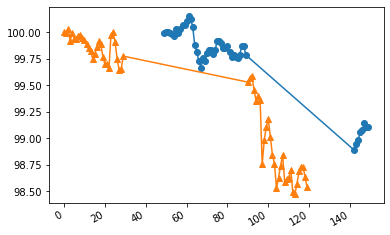

******************************
CV iter: 9
[TRAIN] (50) min dt: 2020-12-14 max dt: 2021-05-11 00:00:00
[VALID] (60) min dt: 2020-10-01 max dt: 2021-02-12 00:00:00


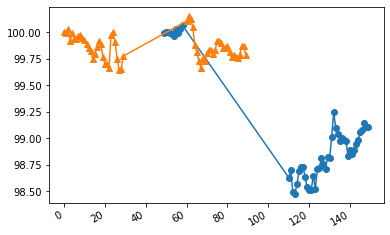

******************************
CV iter: 10
[TRAIN] (70) min dt: 2021-02-01 max dt: 2021-05-11 00:00:00
[VALID] (60) min dt: 2020-10-01 max dt: 2020-12-29 00:00:00


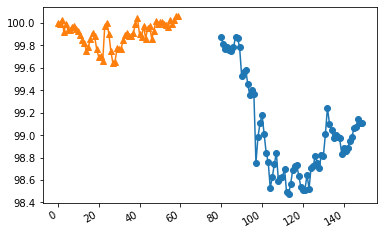

In [161]:
for i, (train, val) in enumerate(cv2.split(btc['Close'], pred_times=btc['pred_times'], eval_times=btc['eval_times'])):
    
    train_data, val_data = btc.iloc[train]['Close'], btc.iloc[val]['Close']
    
    print('*'*30)
    print(f'CV iter: {i+1}')
    print(f'[TRAIN] ({len(train_data)}) min dt: {str(train_data.index.min().date())} max dt: {str(train_data.index.max())}')
    print(f'[VALID] ({len(val_data)}) min dt: {str(val_data.index.min().date())} max dt: {str(val_data.index.max())}')
    plt.plot(figsize=(8,5))
    plt.plot(train, train_data, marker='o')
    plt.plot(val, val_data, marker='^')
    plt.gcf().autofmt_xdate()
    plt.show()

Fold 2 and 4 are not correct I think..

# tscv package



> !pip install tscv



In [162]:
from tscv import gap_train_test_split

In [163]:
train, test = gap_train_test_split(btc['Close'], gap_size=30, test_size=0.3)

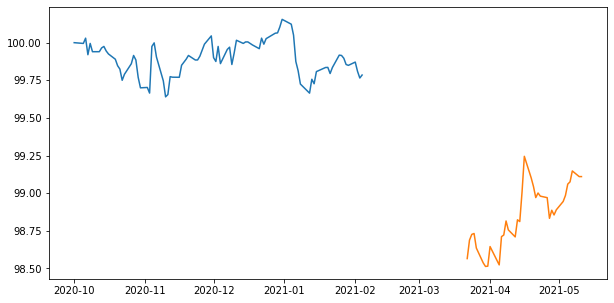

In [164]:
plt.figure(figsize=(10, 5))
plt.plot(train)
plt.plot(test)
plt.show()

In [165]:
from tscv import GapLeavePOut

In [166]:
cv = GapLeavePOut(p=len(btc)//2, gap_before=10, gap_after=30)

******************************
CV iter: 1
[TRAIN] (45) min dt: 2021-03-09 max dt: 2021-05-11 00:00:00
[VALID] (75) min dt: 2020-10-01 max dt: 2021-01-22 00:00:00


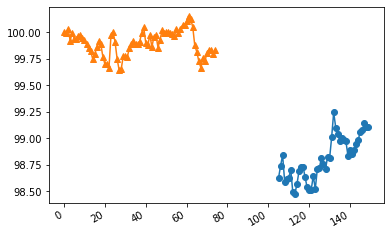

******************************
CV iter: 11
[TRAIN] (35) min dt: 2021-03-23 max dt: 2021-05-11 00:00:00
[VALID] (75) min dt: 2020-10-16 max dt: 2021-02-05 00:00:00


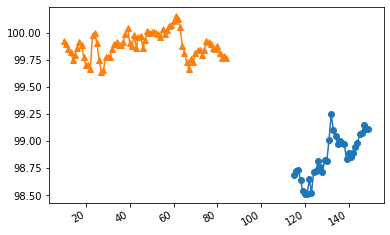

******************************
CV iter: 21
[TRAIN] (35) min dt: 2020-10-01 max dt: 2021-05-11 00:00:00
[VALID] (75) min dt: 2020-10-30 max dt: 2021-02-22 00:00:00


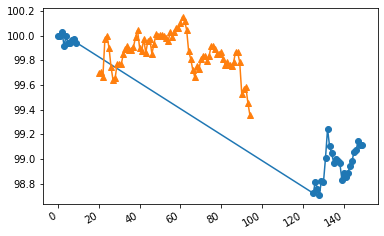

******************************
CV iter: 31
[TRAIN] (35) min dt: 2020-10-01 max dt: 2021-05-11 00:00:00
[VALID] (75) min dt: 2020-11-13 max dt: 2021-03-08 00:00:00


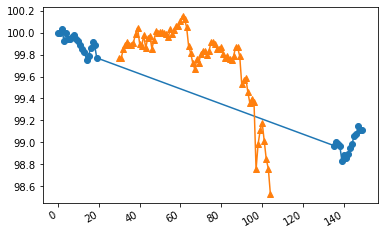

******************************
CV iter: 41
[TRAIN] (35) min dt: 2020-10-01 max dt: 2021-05-11 00:00:00
[VALID] (75) min dt: 2020-12-01 max dt: 2021-03-22 00:00:00


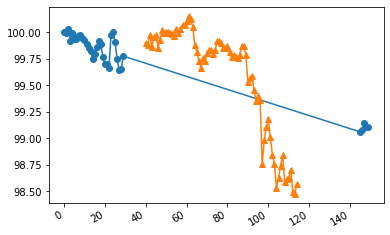

******************************
CV iter: 51
[TRAIN] (40) min dt: 2020-10-01 max dt: 2020-11-30 00:00:00
[VALID] (75) min dt: 2020-12-15 max dt: 2021-04-06 00:00:00


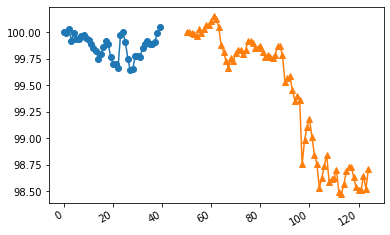

******************************
CV iter: 61
[TRAIN] (50) min dt: 2020-10-01 max dt: 2020-12-14 00:00:00
[VALID] (75) min dt: 2020-12-30 max dt: 2021-04-20 00:00:00


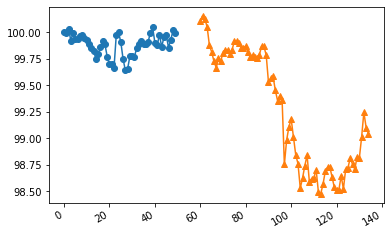

******************************
CV iter: 71
[TRAIN] (60) min dt: 2020-10-01 max dt: 2020-12-29 00:00:00
[VALID] (75) min dt: 2021-01-15 max dt: 2021-05-04 00:00:00


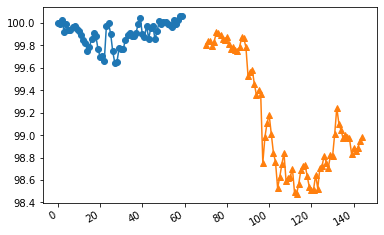

In [167]:
for i, (train, val) in enumerate(cv.split(btc['Close'])):
    if i%10 != 0:
        continue

    train_data, val_data = btc.iloc[train]['Close'], btc.iloc[val]['Close']
    
    print('*'*30)
    print(f'CV iter: {i+1}')
    print(f'[TRAIN] ({len(train_data)}) min dt: {str(train_data.index.min().date())} max dt: {str(train_data.index.max())}')
    print(f'[VALID] ({len(val_data)}) min dt: {str(val_data.index.min().date())} max dt: {str(val_data.index.max())}')
    plt.plot(figsize=(8,5))
    plt.plot(train, train_data, marker='o')
    plt.plot(val, val_data, marker='^')
    plt.gcf().autofmt_xdate()
    plt.show()

In [168]:
from tscv import GapKFold

In [169]:
cv = GapKFold(n_splits=5, gap_before=10, gap_after=30)

******************************
CV iter: 1
[TRAIN] (90) min dt: 2020-12-30 max dt: 2021-05-11 00:00:00
[VALID] (30) min dt: 2020-10-01 max dt: 2020-11-12 00:00:00


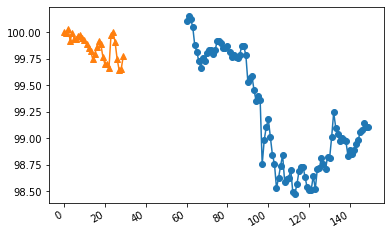

******************************
CV iter: 2
[TRAIN] (80) min dt: 2020-10-01 max dt: 2021-05-11 00:00:00
[VALID] (30) min dt: 2020-11-13 max dt: 2020-12-29 00:00:00


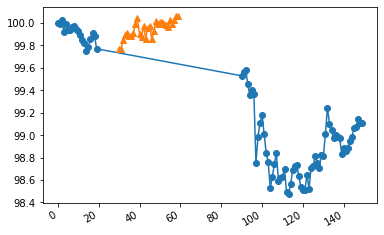

******************************
CV iter: 3
[TRAIN] (80) min dt: 2020-10-01 max dt: 2021-05-11 00:00:00
[VALID] (30) min dt: 2020-12-30 max dt: 2021-02-12 00:00:00


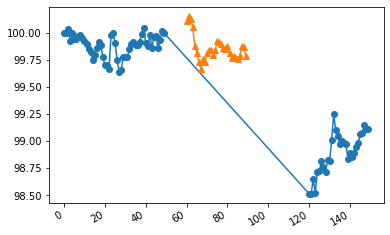

******************************
CV iter: 4
[TRAIN] (80) min dt: 2020-10-01 max dt: 2021-01-29 00:00:00
[VALID] (30) min dt: 2021-02-16 max dt: 2021-03-29 00:00:00


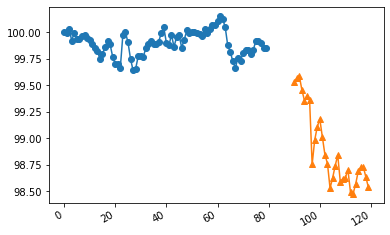

******************************
CV iter: 5
[TRAIN] (110) min dt: 2020-10-01 max dt: 2021-03-15 00:00:00
[VALID] (30) min dt: 2021-03-30 max dt: 2021-05-11 00:00:00


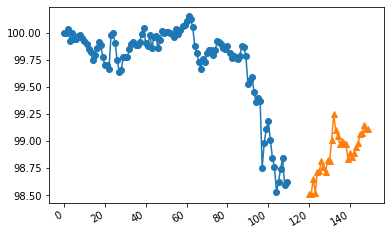

In [170]:
for i, (train, val) in enumerate(cv.split(btc['Close'])):
    
    train_data, val_data = btc.iloc[train]['Close'], btc.iloc[val]['Close']
    
    print('*'*30)
    print(f'CV iter: {i+1}')
    print(f'[TRAIN] ({len(train_data)}) min dt: {str(train_data.index.min().date())} max dt: {str(train_data.index.max())}')
    print(f'[VALID] ({len(val_data)}) min dt: {str(val_data.index.min().date())} max dt: {str(val_data.index.max())}')
    plt.plot(figsize=(8,5))
    plt.plot(train, train_data, marker='o')
    plt.plot(val, val_data, marker='^')
    plt.gcf().autofmt_xdate()
    plt.show()

In [171]:
from tscv import GapRollForward

In [172]:
cv = GapRollForward(min_train_size=len(btc)//5,
                    min_test_size=len(btc)//5, 
                    max_test_size=len(btc)//5, 
                    gap_size=0)

******************************
CV iter: 1
[TRAIN] (30) min dt: 2020-10-01 max dt: 2020-11-12 00:00:00
[VALID] (30)  min dt: 2020-11-13 max dt: 2020-12-29 00:00:00


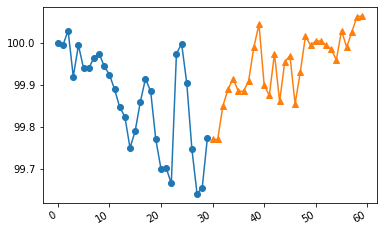

******************************
CV iter: 2
[TRAIN] (60) min dt: 2020-10-01 max dt: 2020-12-29 00:00:00
[VALID] (30)  min dt: 2020-12-30 max dt: 2021-02-12 00:00:00


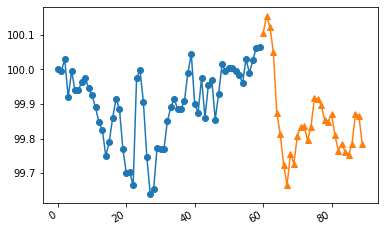

******************************
CV iter: 3
[TRAIN] (90) min dt: 2020-10-01 max dt: 2021-02-12 00:00:00
[VALID] (30)  min dt: 2021-02-16 max dt: 2021-03-29 00:00:00


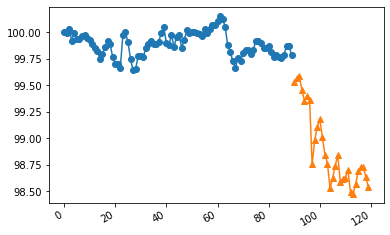

******************************
CV iter: 4
[TRAIN] (120) min dt: 2020-10-01 max dt: 2021-03-29 00:00:00
[VALID] (30)  min dt: 2021-03-30 max dt: 2021-05-11 00:00:00


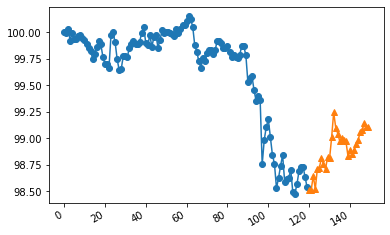

In [173]:
for i, (train, val) in enumerate(cv.split(btc['Close'])):
    
    train_data, val_data = btc.iloc[train]['Close'], btc.iloc[val]['Close']
    
    print('*'*30)
    print(f'CV iter: {i+1}')
    print(f'[TRAIN] ({len(train_data)}) min dt: {str(train_data.index.min().date())} max dt: {str(train_data.index.max())}')
    print(f'[VALID] ({len(val_data)})  min dt: {str(val_data.index.min().date())} max dt: {str(val_data.index.max())}')
    plt.plot(figsize=(8,5))
    plt.plot(train, train_data, marker='o')
    plt.plot(val, val_data, marker='^')
    plt.gcf().autofmt_xdate()
    plt.show()